In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.2


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

from matplotlib.ticker import AutoMinorLocator

In [3]:
import gala.potential as gp
mw = gp.MilkyWayPotential()
mw

<CompositePotential disk,bulge,nucleus,halo>

Text(0, 0.5, '$z$ [kpc]')

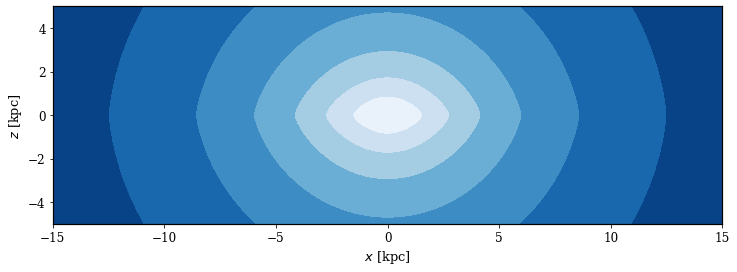

In [4]:
fig,ax = plt.subplots(1, 1, figsize=(12, 4))
x = np.linspace(-15, 15, 100)
z = np.linspace(-5, 5, 100)
mw.plot_contours(grid=(x, 1., z), ax=ax) 
ax.set_xlabel("$x$ [kpc]") 
ax.set_ylabel("$z$ [kpc]") 

In [5]:
import astropy.units as u

In [6]:
xyz = [8.122, 0, 0.0208] * u.kpc
mw.energy(xyz)  ## energia somente do potencial

<Quantity [-0.16355232] kpc2 / Myr2>

In [7]:
import gala.dynamics as gd
sun = gd.PhaseSpacePosition(pos=[-8.122, 0, 0.0208] * u.kpc,
                           vel=[-12.9, 245.6, 7.78] * u.km/u.s)

In [8]:
sun.angular_momentum()

<Quantity [   -5.10848,    62.92084, -1994.7632 ] km kpc / s>

In [9]:
sun.energy(mw).to((u.km*u.km/(u.s*u.s))) ## energia total com o potencial da mw

<Quantity [-126095.56824109] km2 / s2>

In [15]:
orbit = mw.integrate_orbit(sun, dt=1*u.Myr, t1=0, t2=10*u.Gyr)

Lsun = orbit.angular_momentum()
Lsun = Lsun.to(u.kpc*u.km/u.s)

Esun = orbit.energy()
Esun = Esun.to(u.km*u.km/(u.s*u.s))

Esun[0]

<Quantity -126095.56824109 km2 / s2>

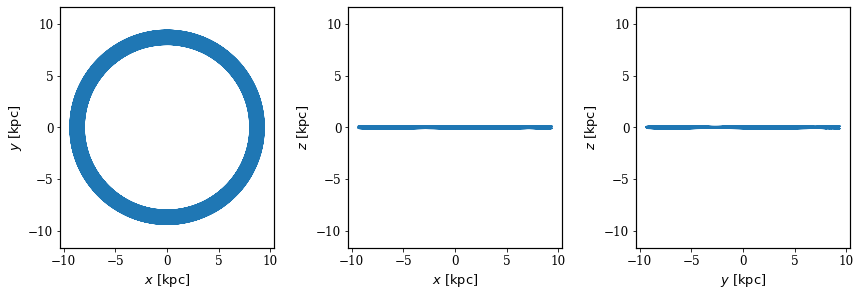

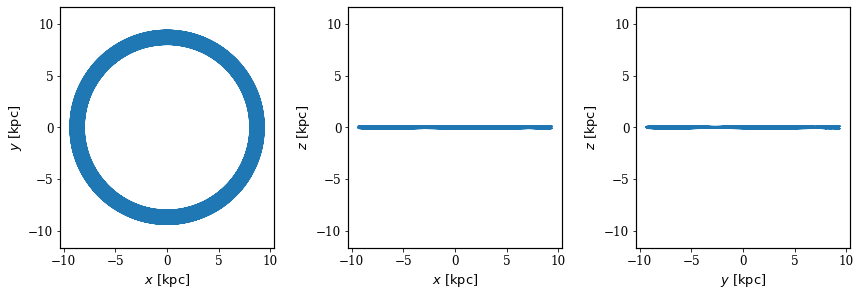

In [16]:
orbit.plot()

In [12]:
orbit.eccentricity()  

<Quantity 0.07761149>

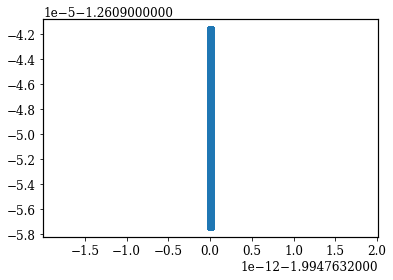

In [22]:
plt.scatter(Lsun[2]/1e3,Esun/1e5)
#plt.scatter(np.mean(L[2]), np.mean(E), color = 'red', zorder = 100)

In [23]:
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord

cl = SkyCoord(ra=114.6*u.deg,dec = 21.577*u.deg, pm_ra_cosdec = -1.22*u.mas/u.yr, pm_dec = -2.04*u.mas/u.yr, radial_velocity=74*u.km/u.s, distance = 2.47*u.kpc, frame = 'icrs')
#cl = cl.transform_to('galactocentric')

In [24]:
cl.representation_type = 'cartesian'
cl

<SkyCoord (ICRS): (x, y, z) in kpc
    (-0.95616065, 2.088436, 0.90834568)
 (v_x, v_y, v_z) in km / s
    (-19.31442953, 76.50199346, 5.00116336)>

In [16]:
coord.Galactocentric()

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

In [17]:
_ = coord.galactocentric_frame_defaults.set('v4.0') 

In [18]:
coord.Galactocentric()

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

In [25]:
cl_err = SkyCoord(ra=0*u.deg, dec=0*u.deg, distance=0.05*u.kpc,
                          pm_ra_cosdec=0.08*u.mas/u.yr,
                          pm_dec=0.08*u.mas/u.yr,
                          radial_velocity=2*u.km/u.s)

In [26]:
v_sun = coord.CartesianDifferential([-12.9, 245.6, 7.78]*u.km/u.s)
gc_frame = coord.Galactocentric(galcen_distance=8.122*u.kpc,
                                z_sun=20.8*u.pc,
                                galcen_v_sun=v_sun)

In [27]:
galcen = cl.transform_to(gc_frame)
galcen

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(-12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (-10.33097896, -0.72292753, 0.85660505)
 (v_x, v_y, v_z) in km / s
    (-81.06939025, 205.76203532, 11.84012666)>

/var/folders/tn/p7vqjv8s24q1q6g_22mfss6m0000gn/T/ipykernel_79970/1468418109.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


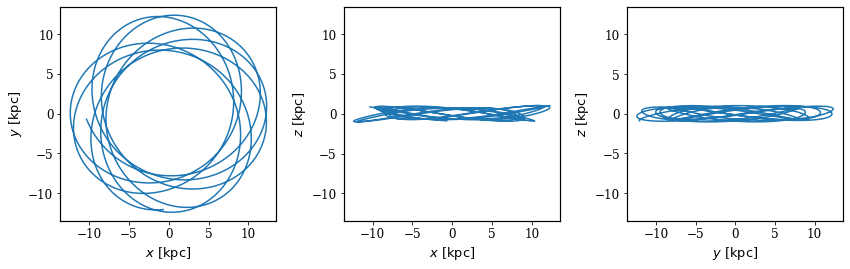

In [34]:
w0 = gd.PhaseSpacePosition(galcen.data)
orbit_cluster = mw.integrate_orbit(w0, dt=-0.2*u.Myr, n_steps=10000)

fig = orbit_cluster.plot()
plt.tight_layout()
plt.savefig('orbit_prel.png', format = 'png', dpi = 300)

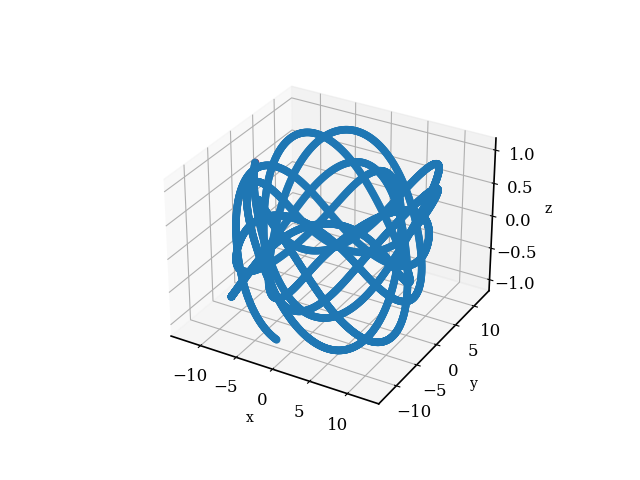

In [64]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(orbit_cluster.x.value,orbit_cluster.y.value,orbit_cluster.z.value)
ax.scatter(orbit_cluster.x.value[0],orbit_cluster.y.value[0],orbit_cluster.z.value[0], color = 'red', zorder = 1000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


In [66]:
%matplotlib inline

In [24]:
L = orbit_cluster.angular_momentum()
L = L.to(u.kpc*u.km/u.s)

E = orbit_cluster.energy()
E = E.to(u.km*u.km/(u.s*u.s))

In [25]:
cl_icrs = gd.PhaseSpacePosition(cl.data)
cl_galactocentric = gd.PhaseSpacePosition(galcen.data)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(sun.angular_momentum()[2].to(u.kpc*u.km/u.s)/1e3 , sun.energy(mw).to((u.km*u.km/(u.s*u.s)))/1e5, color = 'orange', label = 'Sun')
#ax.scatter(cl_galactocentric.angular_momentum()[2].to(u.kpc*u.km/u.s)/1e3 , cl_galactocentric.energy(mw).to((u.km*u.km/(u.s*u.s)))/1e5, color = 'k', label = 'NGC 2420' )
ax.set_xlabel('$\mathbf{L_z}$ [$\mathbf{10^3}$kpc km/s]', fontweight = 'bold', fontsize = 13)
ax.set_ylabel('$\mathbf{E_{tot}}$ [$\mathbf{10^5}$ km$\mathbf{^2}$/s$\mathbf{^2}$]', fontweight = 'bold', fontsize = 13)


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax.legend()
plt.tight_layout()
#plt.savefig('sun_ngc2420_phasespace.png', format = 'png', dpi = 300)

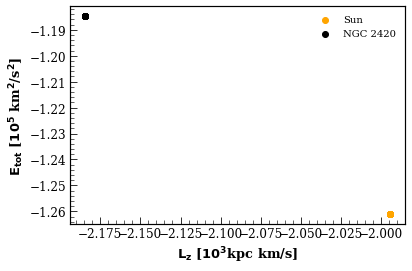

In [68]:
fig, ax = plt.subplots()

ax.scatter(orbit.angular_momentum()[2].to(u.kpc*u.km/u.s)/1e3 , orbit.energy().to((u.km*u.km/(u.s*u.s)))/1e5, color = 'orange', label = 'Sun')
ax.scatter(orbit_cluster.angular_momentum()[2].to(u.kpc*u.km/u.s)/1e3 , orbit_cluster.energy().to((u.km*u.km/(u.s*u.s)))/1e5, color = 'k', label = 'NGC 2420' )
ax.set_xlabel('$\mathbf{L_z}$ [$\mathbf{10^3}$kpc km/s]', fontweight = 'bold', fontsize = 13)
ax.set_ylabel('$\mathbf{E_{tot}}$ [$\mathbf{10^5}$ km$\mathbf{^2}$/s$\mathbf{^2}$]', fontweight = 'bold', fontsize = 13)


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax.legend(frameon = False)
